<a href="https://colab.research.google.com/github/DCNwonu/Text-Analytics_Low-carbon/blob/main/Bert_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install keras
!pip install torch

import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from keras.preprocessing.sequence import pad_sequences

from scipy.spatial.distance import pdist,squareform
from sklearn.decomposition import PCA

import torch
import transformers as ppb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Want BERT instead of distilBERT? Use the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')


# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [3]:
paragraph ="""The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).[4] The outbreak was first identified in Wuhan, Hubei, China, in December 2019, and was recognized as a pandemic by the World Health Organization (WHO) on 11 March 2020.[5] As of 25 March, more than 422,000 cases of COVID-19 have been reported in more than 190 countries and territories, resulting in more than 18,900 deaths and more than 109,000 recoveries.[2][3]
The virus is typically spread during close contact and via respiratory droplets produced when people cough or sneeze.[6][7] Respiratory droplets may be produced during breathing but it is not considered airborne.[6] It may also spread when one touches a contaminated surface and then their face.[6][7] It is most contagious when people are symptomatic, although spread may be possible before symptoms appear.[7] The time between exposure and symptom onset is typically around five days, but may range from two to fourteen days.[8][9] Common symptoms include fever, cough, and shortness of breath.[8] Complications may include pneumonia and acute respiratory distress syndrome.[10] There is no known vaccine or specific antiviral treatment.[6] Primary treatment is symptomatic and supportive therapy.[11] Recommended preventive measures include hand washing, covering the mouth when coughing, maintaining distance from other people, and monitoring and self-isolation for people who suspect they are infected.[6]
Efforts to prevent the virus spreading include travel restrictions, quarantines, curfews, event postponements and cancellations, and facility closures. These include a quarantine of Hubei, nationwide quarantines in Italy and elsewhere in Europe, nationwide lockdown in India, curfew measures elsewhere in China and South Korea,[12][13][14] various border closures or incoming passenger restrictions,[15][16] screening at airports and train stations,[17] and travel advisories regarding regions with community transmission.[18][19][20][21] Schools and universities have closed either on a nationwide or local basis in more than 124 countries, affecting more than 1.2 billion students.[22]
The pandemic has led to global socioeconomic disruption,[23] the postponement or cancellation of sporting, religious, and cultural events,[24] and widespread fears of supply shortages which have spurred panic buying.[25][26] Misinformation and conspiracy theories about the virus have spread online,[27][28] and there have been incidents of xenophobia and racism against Chinese and other East or Southeast Asian people.[29]
Glen Travis Campbell (April 22, 1936 – August 8, 2017) was an American singer, guitarist, songwriter, television host, and actor. He was best known for a series of hit songs in the 1960s and 1970s, and for hosting a music and comedy variety show called The Glen Campbell Goodtime Hour on CBS television, from January 1969 until June 1972.[1] He released 64 albums in a career that spanned five decades, selling over 45 million records worldwide, including twelve gold albums, four platinum albums, and one double-platinum album.
Born in Billstown, Arkansas, Campbell began his professional career as a studio musician in Los Angeles, spending several years playing with the group of instrumentalists later known as "The Wrecking Crew". After becoming a solo artist, he placed a total of 80 different songs on either the Billboard Country Chart, Billboard Hot 100, or Adult Contemporary Chart, of which 29 made the top 10 and of which nine reached number one on at least one of those charts. Among Campbell's hits are "Universal Soldier", his first hit from 1965, along with "Gentle on My Mind" (1967), "By the Time I Get to Phoenix" (1967), "Dreams of the Everyday Housewife" (1968), "Wichita Lineman" (1968), "Galveston" (1969), "Rhinestone Cowboy" (1975) and "Southern Nights" (1977).[2]
In 1967, Campbell won four Grammys in the country and pop categories. For "Gentle on My Mind", he received two awards in country and western; "By the Time I Get to Phoenix" did the same in pop. Three of his early hits later won Grammy Hall of Fame Awards (2000, 2004, 2008), while Campbell himself won the Grammy Lifetime Achievement Award in 2012. He owned trophies for Male Vocalist of the Year from both the Country Music Association (CMA) and the Academy of Country Music (ACM), and took the CMA's top award as 1968 Entertainer of the Year. Campbell played a supporting role in the film True Grit (1969), which earned him a Golden Globe nomination for Most Promising Newcomer. He also sang the title song, which was nominated for an Academy Award.
"""

paragraph_split = sent_tokenize(paragraph)

len(paragraph_split)


30

In [6]:
max_len = 510
input_tokens = []
for i in paragraph_split:
  input_tokens.append(tokenizer.encode(i, add_special_tokens=True))

temp = []
for i in input_tokens:
  #print(len(i))
  temp.append(len(i))
if np.max(temp) > max_len:
  raise ValueError('sentence longer than the max_len')
if np.max(temp) > 512:
  print('warning: sentence longer than 512')
  print('suggest to change max_len to 512, the remainder will be truncated')
input_ids = pad_sequences(input_tokens, maxlen=100, dtype="long", value=0, truncating="post", padding="post")

def create_attention_mask(input_id):
  attention_masks = []
  for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)
  return attention_masks

input_masks = create_attention_mask(input_ids)

input_ids = torch.tensor(input_ids)
attention_mask = torch.tensor(input_masks)


In [7]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))


The BERT model has 199 different named parameters.

==== Embedding Layer ====

embeddings.word_embeddings.weight                       (30522, 768)
embeddings.position_embeddings.weight                     (512, 768)
embeddings.token_type_embeddings.weight                     (2, 768)
embeddings.LayerNorm.weight                                   (768,)
embeddings.LayerNorm.bias                                     (768,)

==== First Transformer ====

encoder.layer.0.attention.self.query.weight               (768, 768)
encoder.layer.0.attention.self.query.bias                     (768,)
encoder.layer.0.attention.self.key.weight                 (768, 768)
encoder.layer.0.attention.self.key.bias                       (768,)
encoder.layer.0.attention.self.value.weight               (768, 768)
encoder.layer.0.attention.self.value.bias                     (768,)
encoder.layer.0.attention.output.dense.weight             (768, 768)
encoder.layer.0.attention.output.dense.bias                   (

In [8]:
with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

sentence_features = last_hidden_states[0][:,0,:].detach().numpy()

sentence_features.shape


(30, 768)

0.4483877


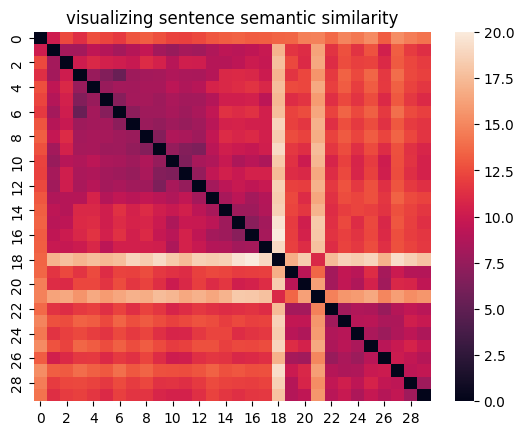

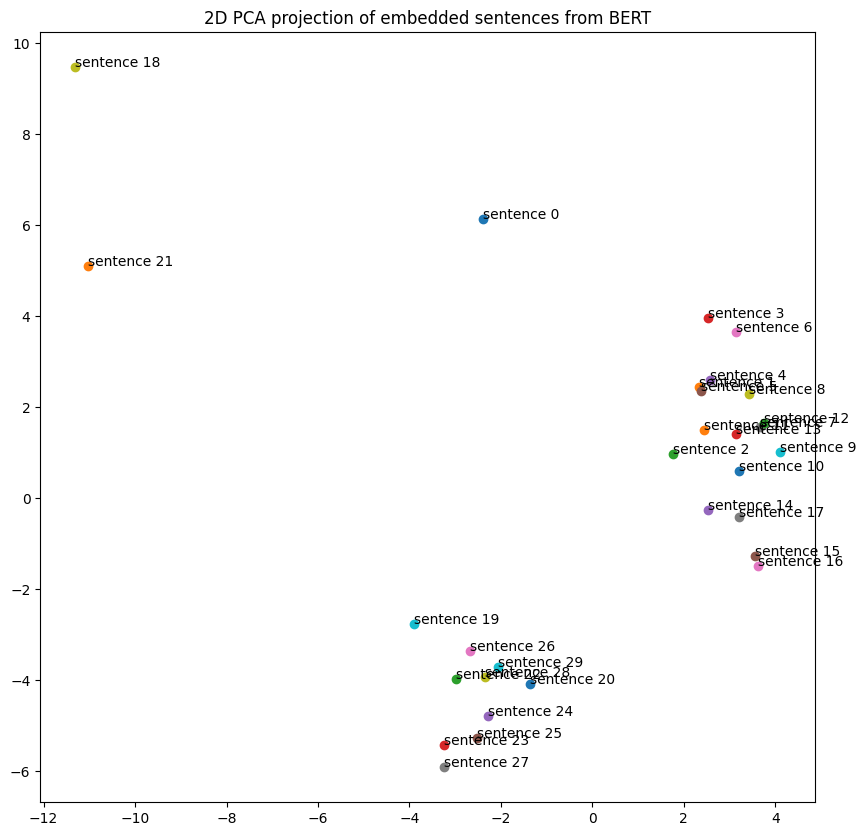

In [9]:
# Visulaize the clusters using PCA

array_similarity = squareform(pdist(sentence_features, metric='euclidean'))
sns.heatmap(array_similarity)
plt.title('visualizing sentence semantic similarity')
pca = PCA(n_components=2)
pca.fit(sentence_features)
print(np.sum(pca.explained_variance_ratio_))
pca_sentence_features = pca.transform(sentence_features)
plt.figure(figsize=(10,10))
for i in range(len(pca_sentence_features)):
  plt.scatter(pca_sentence_features[i,0],pca_sentence_features[i,1])
  plt.annotate('sentence '+ str(i),(pca_sentence_features[i,0],pca_sentence_features[i,1]))
plt.title('2D PCA projection of embedded sentences from BERT')
plt.show()



In [10]:
# Perform K-means clustering to extract most relevant sentences
from sklearn.cluster import KMeans

number_extract = 7  # Number of sentences to extract (summarized output)

kmeans = KMeans(n_clusters=number_extract, random_state=0).fit(sentence_features)
cluster_center = kmeans.cluster_centers_

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(sentence_features)
distances, indices = nbrs.kneighbors(cluster_center)

# Sort and extract relevant sentences
indices = np.sort(indices.reshape(1, -1))
topic_answer = [paragraph_split[i] for i in indices[0]]
# Display the extracted sentence
print(f'The {number_extract} extracted sentences are:')
for i, sentence in enumerate(topic_answer, 1):
    print(f'{i}. {sentence}')



The 7 extracted sentences are:
1. The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).
2. [4] The outbreak was first identified in Wuhan, Hubei, China, in December 2019, and was recognized as a pandemic by the World Health Organization (WHO) on 11 March 2020.
3. [8] Complications may include pneumonia and acute respiratory distress syndrome.
4. [22]
The pandemic has led to global socioeconomic disruption,[23] the postponement or cancellation of sporting, religious, and cultural events,[24] and widespread fears of supply shortages which have spurred panic buying.
5. Born in Billstown, Arkansas, Campbell began his professional career as a studio musician in Los Angeles, spending several years playing with the group of instrumentalists later known as "The Wrecking Crew".
6. After becoming a solo artist, he placed a total of 80 different songs on either the Billboard Country C

In [13]:
!pip install rouge-score
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=45535676656187c01552fe04fc9f4f060ab0ebdc5eb48b954773c5c23ce3e524
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score



Evaluation Metrics:
ROUGE1: Precision=1.0000, Recall=0.2477, F1-Score=0.3970
ROUGE2: Precision=0.9786, Recall=0.2414, F1-Score=0.3873
ROUGEL: Precision=1.0000, Recall=0.2477, F1-Score=0.3970
BLEU: 0.0050


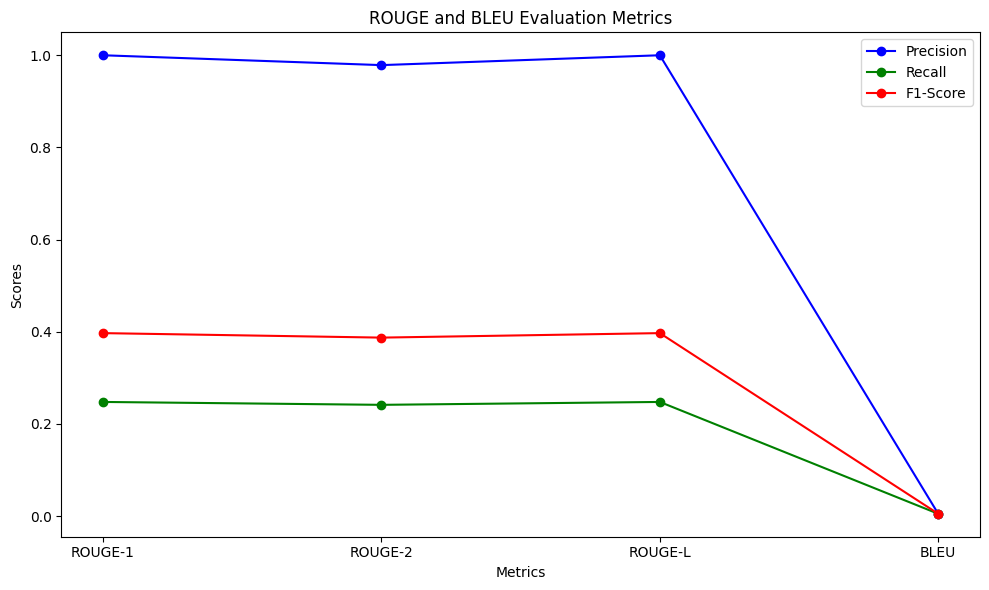

In [18]:
# ROUGE and BLEU Evaluation

# Reference text (the full original text)
reference_text = paragraph

# Hypothesis text (the generated summary)
hypothesis_text = " ".join(topic_answer)

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Compute ROUGE scores
scores = scorer.score(reference_text, hypothesis_text)

# Compute BLEU score
smoothie = SmoothingFunction().method4  # Smoothing to handle brevity in summary
reference_tokens = [sent_tokenize(reference_text)]
hypothesis_tokens = sent_tokenize(hypothesis_text)
bleu_score = sentence_bleu(reference_tokens, hypothesis_tokens, smoothing_function=smoothie)

# Print ROUGE and BLEU Scores
print("\nEvaluation Metrics:")
for metric, score in scores.items():
    print(f"{metric.upper()}: Precision={score.precision:.4f}, Recall={score.recall:.4f}, F1-Score={score.fmeasure:.4f}")
print(f"BLEU: {bleu_score:.4f}")

# Visualization of metrics

# Prepare the data for plotting
metric_names = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
precision_scores = [scores['rouge1'].precision, scores['rouge2'].precision, scores['rougeL'].precision,
                    bleu_score]
recall_scores = [scores['rouge1'].recall, scores['rouge2'].recall, scores['rougeL'].recall,
                 bleu_score]
f1_scores = [scores['rouge1'].fmeasure, scores['rouge2'].fmeasure, scores['rougeL'].fmeasure,
             bleu_score]

# Plot Precision, Recall, F1-Score, and BLEU together
x = range(len(metric_names))
plt.figure(figsize=(10, 6))

plt.plot(x, precision_scores, label='Precision', marker='o', color='b')
plt.plot(x, recall_scores, label='Recall', marker='o', color='g')
plt.plot(x, f1_scores, label='F1-Score', marker='o', color='r')

# Adding labels
plt.xticks(x, metric_names)
plt.title('ROUGE and BLEU Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

